In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [254]:
df = pd.read_csv('wine_1.data')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Class                       178 non-null    int64  
 1   Alcohol                     178 non-null    float64
 2   Malicacid                   176 non-null    float64
 3   Ash                         177 non-null    float64
 4   Alcalinityofash             178 non-null    float64
 5   Magnesium                   178 non-null    float64
 6   Totalphenols                178 non-null    float64
 7   Flavanoids                  178 non-null    float64
 8   Nonflavanoidphenols         178 non-null    float64
 9   Proanthocyanins             178 non-null    float64
 10  Colorintensity              177 non-null    float64
 11  Hue                         178 non-null    float64
 12  OD280/OD315ofdiluted wines  178 non-null    float64
 13  Proline                     176 non

In [255]:
df.isnull().sum()
# eksik verileri belirle

Class                         0
Alcohol                       0
Malicacid                     2
Ash                           1
Alcalinityofash               0
Magnesium                     0
Totalphenols                  0
Flavanoids                    0
Nonflavanoidphenols           0
Proanthocyanins               0
Colorintensity                1
Hue                           0
OD280/OD315ofdiluted wines    0
Proline                       2
dtype: int64

In [256]:
df["Malicacid"].fillna(df["Malicacid"].mean(), inplace=True)
df["Ash"].fillna(df["Ash"].mean(), inplace=True)
df["Colorintensity"].fillna(df["Colorintensity"].mean(), inplace=True)
df["Proline"].fillna(df["Proline"].mean(), inplace=True)
# mean ile doldurmamızın sebebi - continuous değişkenler

/tmp/ipykernel_70953/1378278621.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Malicacid"].fillna(df["Malicacid"].mean(), inplace=True)
/tmp/ipykernel_70953/1378278621.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplac

In [257]:
df.isnull().sum()
# eksik verileri belirle

Class                         0
Alcohol                       0
Malicacid                     0
Ash                           0
Alcalinityofash               0
Magnesium                     0
Totalphenols                  0
Flavanoids                    0
Nonflavanoidphenols           0
Proanthocyanins               0
Colorintensity                0
Hue                           0
OD280/OD315ofdiluted wines    0
Proline                       0
dtype: int64

In [258]:
df

,Class,Alcohol,Malicacid,Ash,Alcalinityofash,Magnesium,Totalphenols,Flavanoids,Nonflavanoidphenols,Proanthocyanins,Colorintensity,Hue,OD280/OD315ofdiluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.000000
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.000000
2,1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.000000
3,1,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.000000
4,1,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.000000
174,3,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.000000
175,3,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.000000
176,3,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.000000


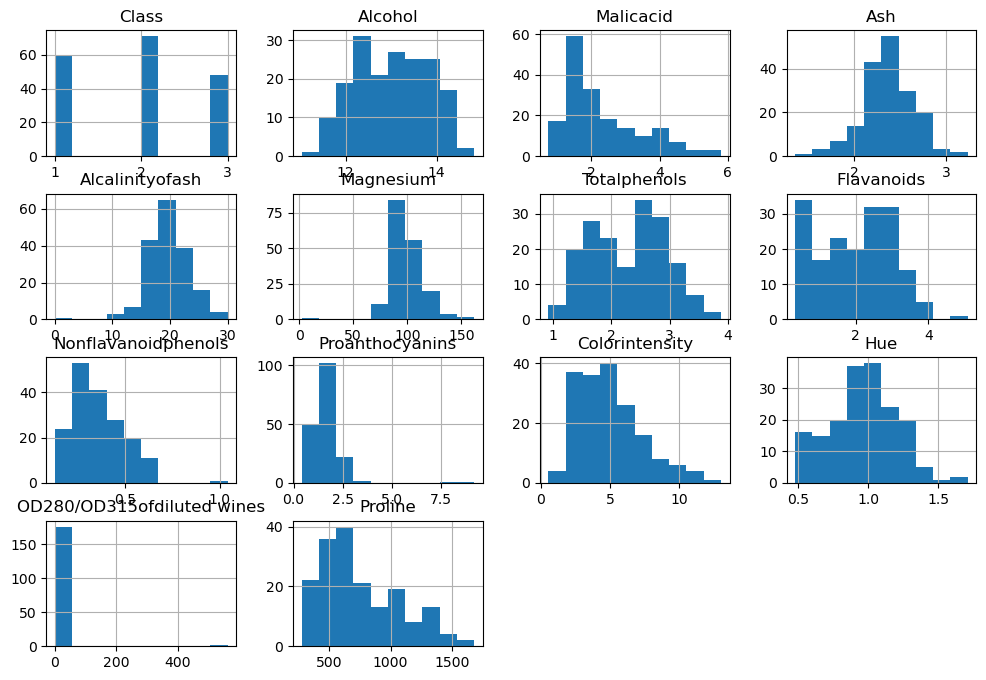

Outliers for Class: []
Outliers for Alcohol: []
Outliers for Malicacid: [5.8  5.51 5.19 5.65]
Outliers for Ash: [3.22 1.36 1.7  1.7  3.23]
Outliers for Alcalinityofash: [30.  28.5 28.5  0. ]
Outliers for Magnesium: [151.  139.  136.  162.    2.3]
Outliers for Totalphenols: []
Outliers for Flavanoids: []
Outliers for Nonflavanoidphenols: [1.04]
Outliers for Proanthocyanins: [3.28 3.58 7.65 9.2 ]
Outliers for Colorintensity: [10.8  13.   11.75 10.68]
Outliers for Hue: [1.71]
Outliers for OD280/OD315ofdiluted wines: [520. 560.]
Outliers for Proline: []
Outliers (Z-score > 3):


In [259]:
df.hist(figsize=(12,8))
plt.show()

# Quantile tabanlı outlier tespiti
for col in df.columns:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = df[(df[col] < lower) | (df[col] > upper)][col]
    print(f"Outliers for {col}: {outliers.values}")

# Z-skor tabanlı outlier tespiti 
from scipy.stats import zscore
z = np.abs(zscore(df))
print("Outliers (Z-score > 3):")

In [260]:
def detect_outliers_iqr(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    return (data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))

# Apply the function to each column of interest
outliers = df.apply(detect_outliers_iqr)

# Print outliers
for column in df.columns:
    print(f"Outliers in {column}:")
    print(df[column][outliers[column]])


Outliers in Class:
Series([], Name: Class, dtype: int64)
Outliers in Alcohol:
Series([], Name: Alcohol, dtype: float64)
Outliers in Malicacid:
123    5.80
137    5.51
155    5.19
173    5.65
Name: Malicacid, dtype: float64
Outliers in Ash:
25     3.22
59     1.36
66     1.70
100    1.70
121    3.23
Name: Ash, dtype: float64
Outliers in Alcalinityofash:
73     30.0
121    28.5
127    28.5
160     0.0
Name: Alcalinityofash, dtype: float64
Outliers in Magnesium:
69     151.0
73     139.0
78     136.0
95     162.0
160      2.3
Name: Magnesium, dtype: float64
Outliers in Totalphenols:
Series([], Name: Totalphenols, dtype: float64)
Outliers in Flavanoids:
Series([], Name: Flavanoids, dtype: float64)
Outliers in Nonflavanoidphenols:
160    1.04
Name: Nonflavanoidphenols, dtype: float64
Outliers in Proanthocyanins:
95     3.28
110    3.58
160    7.65
177    9.20
Name: Proanthocyanins, dtype: float64
Outliers in Colorintensity:
151    10.80
158    13.00
159    11.75
166    10.68
Name: Colorinte

### def remove_outliers_iqr(df):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    # Calculate IQR
    IQR = Q3 - Q1
    
    # Filter out the outliers
    df_filtered = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]
    
    return df_filtered

# Remove outliers from the entire dataframe
df_clean = remove_outliers_iqr(df)

# Print the dataframe after removing outliers
print(df_clean)

In [261]:
df_clean

,Class,Alcohol,Malicacid,Ash,Alcalinityofash,Magnesium,Totalphenols,Flavanoids,Nonflavanoidphenols,Proanthocyanins,Colorintensity,Hue,OD280/OD315ofdiluted wines,Proline
0,1,0.871508,-0.099448,0.231405,-0.866242,1.589041,0.381818,0.538346,-0.34375,1.188976,0.342342,0.18750,0.986784,0.726168
1,1,0.104283,-0.047882,-0.727273,-1.987261,0.109589,0.245455,0.357895,-0.46875,-0.401575,-0.111712,0.21875,0.528634,0.698131
2,1,0.074488,0.379374,1.024793,-0.101911,0.164384,0.381818,0.646617,-0.21875,2.007874,0.356757,0.15625,0.325991,0.950467
3,1,0.975791,0.077348,0.462810,-0.560510,0.821918,1.336364,0.796992,-0.59375,1.015748,1.120721,-0.37500,0.572687,1.501869
4,1,0.134078,0.548803,1.685950,0.509554,1.095890,0.381818,0.315789,0.34375,0.448819,-0.133333,0.18750,0.114537,0.109346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,3,-0.216015,0.401473,-0.264463,0.127389,-0.657534,-0.900000,-0.995489,0.90625,-1.409449,0.090864,-1.28125,-1.030837,-0.385981
172,3,0.819367,0.489871,0.396694,0.254777,-0.383562,-0.636364,-0.881203,0.65625,-0.464567,1.805405,-1.12500,-0.960352,-0.030841
174,3,0.253259,1.521179,0.396694,1.019108,0.219178,-0.527273,-0.851128,0.59375,-0.196850,0.940541,-0.87500,-1.092511,0.137383
175,3,0.156425,1.793738,-0.330579,0.254777,1.205479,-0.718182,-0.887218,0.59375,-0.291339,1.985586,-1.21875,-1.092511,0.296262


In [262]:
ilk_veri = df

In [263]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, RobustScaler
scaler = RobustScaler()

# List of columns to be scaled
columns_to_scale = [
    "Alcohol", "Malicacid", "Ash", "Alcalinityofash", "Magnesium", 
    "Totalphenols", "Flavanoids", "Nonflavanoidphenols", "Proanthocyanins", 
    "Colorintensity", "Hue", "OD280/OD315ofdiluted wines", "Proline"
]

# Apply Robust to the selected columns
df_clean[columns_to_scale] = scaler.fit_transform(df_clean[columns_to_scale])

/tmp/ipykernel_70953/1812831565.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[columns_to_scale] = scaler.fit_transform(df_clean[columns_to_scale])


In [264]:
df_clean
# robust ile normalize edilmiş veri seti

,Class,Alcohol,Malicacid,Ash,Alcalinityofash,Magnesium,Totalphenols,Flavanoids,Nonflavanoidphenols,Proanthocyanins,Colorintensity,Hue,OD280/OD315ofdiluted wines,Proline
0,1,0.871508,-0.099448,0.231405,-0.866242,1.589041,0.381818,0.538346,-0.34375,1.188976,0.342342,0.18750,0.986784,0.726168
1,1,0.104283,-0.047882,-0.727273,-1.987261,0.109589,0.245455,0.357895,-0.46875,-0.401575,-0.111712,0.21875,0.528634,0.698131
2,1,0.074488,0.379374,1.024793,-0.101911,0.164384,0.381818,0.646617,-0.21875,2.007874,0.356757,0.15625,0.325991,0.950467
3,1,0.975791,0.077348,0.462810,-0.560510,0.821918,1.336364,0.796992,-0.59375,1.015748,1.120721,-0.37500,0.572687,1.501869
4,1,0.134078,0.548803,1.685950,0.509554,1.095890,0.381818,0.315789,0.34375,0.448819,-0.133333,0.18750,0.114537,0.109346
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
171,3,-0.216015,0.401473,-0.264463,0.127389,-0.657534,-0.900000,-0.995489,0.90625,-1.409449,0.090864,-1.28125,-1.030837,-0.385981
172,3,0.819367,0.489871,0.396694,0.254777,-0.383562,-0.636364,-0.881203,0.65625,-0.464567,1.805405,-1.12500,-0.960352,-0.030841
174,3,0.253259,1.521179,0.396694,1.019108,0.219178,-0.527273,-0.851128,0.59375,-0.196850,0.940541,-0.87500,-1.092511,0.137383
175,3,0.156425,1.793738,-0.330579,0.254777,1.205479,-0.718182,-0.887218,0.59375,-0.291339,1.985586,-1.21875,-1.092511,0.296262


In [265]:
y = df_clean['Class']
# tahmin edilecek değerler
x= df_clean

In [266]:
x_train , x_test , y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=30)

In [267]:
x_train

,Class,Alcohol,Malicacid,Ash,Alcalinityofash,Magnesium,Totalphenols,Flavanoids,Nonflavanoidphenols,Proanthocyanins,Colorintensity,Hue,OD280/OD315ofdiluted wines,Proline
128,2,-0.513966,-0.158379,-0.198347,1.401274,-0.547945,-0.145455,0.171429,0.40625,0.574803,-0.926126,-0.28125,-0.017621,-0.625234
170,3,-0.640596,0.872928,-0.132231,0.000000,-0.109589,-1.027273,-1.007519,0.40625,-1.267717,0.291892,-1.00000,-0.854626,-0.311215
65,2,-0.513966,-0.467772,0.661157,-0.229299,0.000000,0.036364,0.291729,0.21875,0.858268,-0.032432,0.65625,-0.440529,0.002804
169,3,0.253259,2.029466,1.652893,1.528662,0.767123,-0.363636,-0.724812,-0.40625,-0.669291,1.372973,-0.96875,-0.775330,-0.086916
109,2,-1.080074,-0.364641,1.123967,0.254777,-0.219178,0.327273,0.454135,-0.28125,1.503937,-0.735135,-0.06250,0.405286,0.006542
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
144,3,-0.603352,1.499079,-0.528926,-0.127389,0.767123,-0.909091,-0.833083,-0.28125,-0.622047,1.268468,-1.03125,-0.704846,0.333645
171,3,-0.216015,0.401473,-0.264463,0.127389,-0.657534,-0.900000,-0.995489,0.90625,-1.409449,0.090864,-1.28125,-1.030837,-0.385981
156,3,0.581006,1.675875,0.066116,0.127389,-0.493151,-0.527273,-0.803008,0.90625,0.039370,1.556757,-1.28125,-1.022026,-0.367290
46,1,0.983240,1.285451,-0.264463,-0.764331,0.219178,0.790909,0.604511,-0.40625,1.031496,0.075676,0.18750,0.563877,0.726168


In [268]:
x_test.count()

Class                         47
Alcohol                       47
Malicacid                     47
Ash                           47
Alcalinityofash               47
Magnesium                     47
Totalphenols                  47
Flavanoids                    47
Nonflavanoidphenols           47
Proanthocyanins               47
Colorintensity                47
Hue                           47
OD280/OD315ofdiluted wines    47
Proline                       47
dtype: int64

In [269]:
y_train.count()


109

In [270]:
y_test.count()

47

In [271]:
models = { 'Logististic Regression': LogisticRegression(), 'K-NN':KNeighborsClassifier(), 'SVM': SVC() }

In [272]:
# 3 ayrı model kullanıp başarı değerlerine bakacağız
accuracy_values = {}

In [273]:
for model_name, model in models.items():
    # modelimizi eğitelim
    model.fit(x_train,y_train)
    # test versi ile tahmin yapalım
    y_predicition = model.predict(x_test)
    # doğruluk oranını hesaplayalım
    accuracy = accuracy_score( y_test, y_predicition)
    # accuracy değerini sözlüğe koyalım
    accuracy_values[model_name] = accuracy

In [274]:
y_predicition
accuracy

1.0

In [275]:
print('Doğruluk oranları:')
for model_name, accuracy in accuracy_values.items():
    print( f'{ model_name}: { accuracy * 100:.2f}%')

Doğruluk oranları:
Logististic Regression: 97.87%
K-NN: 93.62%
SVM: 100.00%


In [276]:
x_train , x_test , y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=30)
# reduce test size


In [277]:
models = { 'Logististic Regression': LogisticRegression(), 'K-NN':KNeighborsClassifier(), 'SVM': SVC() }
# 3 ayrı model kullanıp başarı değerlerine bakacağız
accuracy_values = {}
for model_name, model in models.items():
    # modelimizi eğitelim
    model.fit(x_train,y_train)
    # test versi ile tahmin yapalım
    y_predicition = model.predict(x_test)
    # doğruluk oranını hesaplayalım
    accuracy = accuracy_score( y_test, y_predicition)
    # accuracy değerini sözlüğe koyalım
    accuracy_values[model_name] = accuracy
print('Doğruluk oranları:')
for model_name, accuracy in accuracy_values.items():
    print( f'{ model_name}: { accuracy * 100:.2f}%')

Doğruluk oranları:
Logististic Regression: 96.88%
K-NN: 90.62%
SVM: 100.00%


In [278]:
# ilk veri ye de bir bakalım
y = df['Class']
# tahmin edilecek değerler
x= df

In [279]:
x_train , x_test , y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [280]:
models = { 'Logististic Regression': LogisticRegression(max_iter=100000), 'K-NN':KNeighborsClassifier(), 'SVM': SVC(max_iter=1000) }
# 3 ayrı model kullanıp başarı değerlerine bakacağız
accuracy_values = {}
for model_name, model in models.items():
    # modelimizi eğitelim
    model.fit(x_train,y_train)
    # test versi ile tahmin yapalım
    y_predicition = model.predict(x_test)
    # doğruluk oranını hesaplayalım
    accuracy = accuracy_score( y_test, y_predicition)
    # accuracy değerini sözlüğe koyalım
    accuracy_values[model_name] = accuracy
print('Doğruluk oranları:')
for model_name, accuracy in accuracy_values.items():
    print( f'{ model_name}: { accuracy * 100:.2f}%')

Doğruluk oranları:
Logististic Regression: 91.67%
K-NN: 72.22%
SVM: 69.44%


In [281]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=100000),
    'K-NN': KNeighborsClassifier(),
    'SVM': SVC(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    #'XGBoost': XGBClassifier()
}

In [282]:
accuracy_values = {}
for model_name, model in models.items():
    # modelimizi eğitelim
    model.fit(x_train,y_train)
    # test versi ile tahmin yapalım
    y_predicition = model.predict(x_test)
    # doğruluk oranını hesaplayalım
    accuracy = accuracy_score( y_test, y_predicition)
    # accuracy değerini sözlüğe koyalım
    accuracy_values[model_name] = accuracy
print('Doğruluk oranları:')
for model_name, accuracy in accuracy_values.items():
    print( f'{ model_name}: { accuracy * 100:.2f}%')

Doğruluk oranları:
Logistic Regression: 91.67%
K-NN: 72.22%
SVM: 69.44%
Decision Tree: 100.00%
Random Forest: 100.00%


In [283]:
ilk_veri

,Class,Alcohol,Malicacid,Ash,Alcalinityofash,Magnesium,Totalphenols,Flavanoids,Nonflavanoidphenols,Proanthocyanins,Colorintensity,Hue,OD280/OD315ofdiluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.000000
1,1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.000000
2,1,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.000000
3,1,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.000000
4,1,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.000000
174,3,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.000000
175,3,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.000000
176,3,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.000000


In [284]:
ilk_veri.isnull().sum()

Class                         0
Alcohol                       0
Malicacid                     0
Ash                           0
Alcalinityofash               0
Magnesium                     0
Totalphenols                  0
Flavanoids                    0
Nonflavanoidphenols           0
Proanthocyanins               0
Colorintensity                0
Hue                           0
OD280/OD315ofdiluted wines    0
Proline                       0
dtype: int64

In [285]:
# ilk veri ye de bir bakalım
y = ilk_veri['Class']
# tahmin edilecek değerler
x= ilk_veri

In [286]:
x_train , x_test , y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)


In [287]:
models = { 'Logististic Regression': LogisticRegression(max_iter=100000), 'K-NN':KNeighborsClassifier(), 'SVM': SVC(max_iter=1000) }
# 3 ayrı model kullanıp başarı değerlerine bakacağız
accuracy_values = {}
for model_name, model in models.items():
    # modelimizi eğitelim
    model.fit(x_train,y_train)
    # test versi ile tahmin yapalım
    y_predicition = model.predict(x_test)
    # doğruluk oranını hesaplayalım
    accuracy = accuracy_score( y_test, y_predicition)
    # accuracy değerini sözlüğe koyalım
    accuracy_values[model_name] = accuracy
print('Doğruluk oranları:')
for model_name, accuracy in accuracy_values.items():
    print( f'{ model_name}: { accuracy * 100:.2f}%')

Doğruluk oranları:
Logististic Regression: 91.67%
K-NN: 72.22%
SVM: 69.44%


In [288]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

models = {
    'Logistic Regression': LogisticRegression(max_iter=100000),
    'K-NN': KNeighborsClassifier(),
    'SVM': SVC(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    #'XGBoost': XGBClassifier()
}

In [289]:
accuracy_values = {}
for model_name, model in models.items():
    # modelimizi eğitelim
    model.fit(x_train,y_train)
    # test versi ile tahmin yapalım
    y_predicition = model.predict(x_test)
    # doğruluk oranını hesaplayalım
    accuracy = accuracy_score( y_test, y_predicition)
    # accuracy değerini sözlüğe koyalım
    accuracy_values[model_name] = accuracy
print('Doğruluk oranları:')
for model_name, accuracy in accuracy_values.items():
    print( f'{ model_name}: { accuracy * 100:.2f}%')

Doğruluk oranları:
Logistic Regression: 91.67%
K-NN: 72.22%
SVM: 69.44%
Decision Tree: 100.00%
Random Forest: 97.22%


In [290]:
test_sizes = [0.1, 0.2, 0.3]
random_states = [10, 20, 30, 40, 50, 60, 70, 80, 90]

for test_size in test_sizes:
    for random_state in random_states:
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=random_state)

        models = {
    'Logistic Regression': LogisticRegression(max_iter=100000),
    'K-NN': KNeighborsClassifier(),
    'SVM': SVC(max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    #'XGBoost': XGBClassifier()
}

        accuracy_values = {}
        for model_name, model in models.items():
            # Train the model
            model.fit(x_train, y_train)
            # Make predictions on the test set
            y_prediction = model.predict(x_test)
            # Calculate the accuracy score
            accuracy = accuracy_score(y_test, y_prediction)
            # Store the accuracy value in the dictionary
            accuracy_values[model_name] = accuracy

        print(f"Test size: {test_size}, Random state: {random_state}")
        print('Accuracy scores:')
        for model_name, accuracy in accuracy_values.items():
            print(f"{model_name}: {accuracy * 100:.2f}%")
        print()

Test size: 0.1, Random state: 10
Accuracy scores:
Logistic Regression: 88.89%
K-NN: 83.33%
SVM: 72.22%
Decision Tree: 100.00%
Random Forest: 94.44%

Test size: 0.1, Random state: 20
Accuracy scores:
Logistic Regression: 100.00%
K-NN: 66.67%
SVM: 77.78%
Decision Tree: 100.00%
Random Forest: 100.00%

Test size: 0.1, Random state: 30
Accuracy scores:
Logistic Regression: 94.44%
K-NN: 38.89%
SVM: 66.67%
Decision Tree: 100.00%
Random Forest: 100.00%

Test size: 0.1, Random state: 40
Accuracy scores:
Logistic Regression: 100.00%
K-NN: 55.56%
SVM: 66.67%
Decision Tree: 100.00%
Random Forest: 100.00%

Test size: 0.1, Random state: 50
Accuracy scores:
Logistic Regression: 94.44%
K-NN: 55.56%
SVM: 61.11%
Decision Tree: 100.00%
Random Forest: 100.00%

Test size: 0.1, Random state: 60
Accuracy scores:
Logistic Regression: 100.00%
K-NN: 83.33%
SVM: 88.89%
Decision Tree: 100.00%
Random Forest: 100.00%

Test size: 0.1, Random state: 70
Accuracy scores:
Logistic Regression: 88.89%
K-NN: 50.00%
SVM: 61